## ACELERADEV DATA SCIENCE
## ENEM 2016 CLASSIFICATION EXERCISE

### Ninth module - Predict which students did ENEM 2016 as training

Goal: create classifier model to predict which students did ENEM 2016 as training. Use train.csv to train a model and test.csv to classify the students (column `IN_TREINEIRO`). Save your answer in an archive named answer.csv with two columns: `NU_INSCRICAO` and `IN_TREINEIRO`.

### Oitavo módulo - Prever alunos que fizeram ENEM 2016 como treineiros

Objetivo: criar um modelo para prever que estudantes fizeram o ENEM 2016 como treineiros. Crie um modelo de classificação binária com a coluna alvo `IN_TREINEIRO` de quem participou do ENEM 2016 como treineiro. Salve sua resposta em um arquivo chamado answer.csv com duas colunas: `NU_INSCRICAO` e `IN_TREINEIRO`.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [2]:
sns.set_style('whitegrid')
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(6, 6)

sns.set()

### Import Data

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Exploratory Data Analysis

#### Checking train and test sets sizes

In [4]:
print(f'Train set size: {train_df.shape}\nTest set size:{test_df.shape}')
print('\nIs every column of the test set in the train set?')
print(f'{np.all([(test_col in train_df.columns) for test_col in test_df.columns])}')

Train set size: (13730, 167)
Test set size:(4570, 43)

Is every column of the test set in the train set?
True


In [5]:
train_df.shape

(13730, 167)

In [6]:
train_df.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Control df

In [7]:
def makeControlDf(df):
    '''
    Create a dataframe with the input columns' names, dtypes, percentage of missing values,
    number of unique values and rate of unique values.
    :param df: pandas DataFrame
    :return: pandas DataFrame with features 'column', 'dtype', 'missing_pct', 'uniques' and 'unique_rate'
    '''
    control_df = pd.DataFrame({'column':df.columns,
                               'dtype':df.dtypes,
                               'missing_pct':(100*df.isna().sum()/df.shape[0]).round(2),
                               'uniques':df.nunique(),
                               'unique_rate':(100*df.nunique()/df.shape[0]).round(2)}).reset_index(drop=True)
    return control_df
control_df = makeControlDf(train_df)
control_df

,column,dtype,missing_pct,uniques,unique_rate
0,Unnamed: 0,int64,0.00,4587,33.41
1,NU_INSCRICAO,object,0.00,13730,100.00
2,NU_ANO,int64,0.00,1,0.01
3,CO_MUNICIPIO_RESIDENCIA,int64,0.00,2709,19.73
4,NO_MUNICIPIO_RESIDENCIA,object,0.00,2632,19.17
5,CO_UF_RESIDENCIA,int64,0.00,27,0.20
6,SG_UF_RESIDENCIA,object,0.00,27,0.20
7,NU_IDADE,int64,0.00,55,0.40
8,TP_SEXO,object,0.00,2,0.01
9,TP_ESTADO_CIVIL,float64,3.85,4,0.03


#### Function to drop columns 

In [8]:
def dropColumns(df, cols):
    '''
    Drop required columns from pandas DataFrame
    :param df: pandas DataFrame
    :param columns_to_drop: list with strings related to the DataFrame's columns.
    :return: pandas DataFrame without required features.
    '''
    for col in cols:
        if col in df.columns.values:
            df.drop(col, axis=1, inplace=True)

#### Checking rows and columns with missing values

Let's remove the `NU_INSCRICAO` column from the training set, it behaves as an ID column and it is useless to train the model.
The train and test sets have different features dimension. Let's use the same columns available in the test set to train our model (plus the target).

In [9]:
initial_columns = ['IN_TREINEIRO'] + list(test_df.columns)
train_df = train_df[initial_columns]
train_df.drop(columns=['NU_INSCRICAO'], axis=1, inplace=True)

The graphic below shows us the percentage of missing values per row.

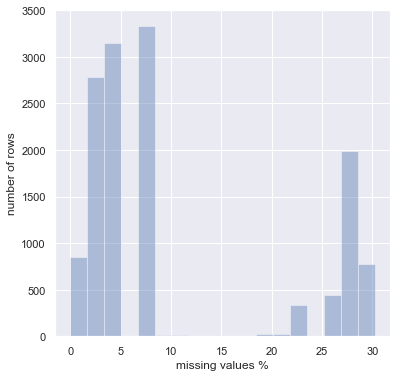

In [10]:
def missingPerRow(df):
    '''
    Return a Pandas Series with missing value percentage per rows.
    :param df: Pandas DataFrame from which the percentages are to be calculated
    :return: Pandas Series with missing percentage per row.
    '''
    mpr = (100*df.isna().sum(axis=1)/df.shape[1]).round(2)
    return mpr

mpr = missingPerRow(train_df)

sns.distplot(mpr, kde=False)
plt.ylabel('number of rows')
plt.xlabel('missing values %');

In [11]:
print(f'Number of rows with more than 15% missing values: {train_df[mpr > 15].shape[0]}')

Number of rows with more than 15% missing values: 3597


There are 3597 rows in which the percentage of missing values is higher than 15%.  
Let's first impute the NAN values of the test grade features and see the difference in the distribution. As seen below, there are 3597 rows in which the math test value is absent.

There's a flag feature for each test that tells us if the student was present during the test (0 for not present) or if she was eliminated (2 for eliminated), so we can impute the missing values with zeroes in the test grade features. These are:  
* `TP_PRESENCA_CN` for the math test (`NU_NOTA_CN`)  
* `TP_PRESENCA_CH` for the math test (`NU_NOTA_CH`)  
* `TP_PRESENCA_LC` for the math test (`NU_NOTA_LC`)  

In [12]:
pd.concat([
    train_df.groupby(['TP_PRESENCA_CN']).sum()['NU_NOTA_CN'],
    train_df.groupby(['TP_PRESENCA_CH']).sum()['NU_NOTA_CH'],
    train_df.groupby(['TP_PRESENCA_LC']).sum()['NU_NOTA_LC']], axis=1)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
0,0.0,0.0,0.0
1,4896413.4,5477225.3,5233419.3
2,0.0,0.0,0.0


In [13]:
def fillGrades(x):
    '''
    Impute missing values from test grades based on the respective flags for students'
    presence during the test and test elimination/validity status.
    :param x: to be used with Pandas apply method, represent two positional list.
    First position is flag, second is test grade.
    :return: missing values are imputed with 0 if the flag is 0 or 2. Else, original
    grade is returned.
    '''
    flag=x[0]
    grade=x[1]
    if flag in [0, 2]:
        return 0
    else:
        return grade

test_grades = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']
flags = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC']
for flag, test_grade in zip(flags, test_grades):
    train_df[test_grade] = train_df[[flag, test_grade]].apply(fillGrades, axis=1)

control_df = makeControlDf(train_df)

Let's also fill up our test features based in these same rules.

In [14]:
test_grades = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']
flags = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC']
for flag, test_grade in zip(flags, test_grades):
    test_df[test_grade] = test_df[[flag, test_grade]].apply(fillGrades, axis=1)

The written essay test, `NU_NOTA_REDACAO`, was given the same day as the math test, so if the student wasn't present this day, he didn't get a grade in any of the essay related tests. Let's impute these with zeroes.

In [15]:
pd.concat([
    train_df.groupby(['TP_PRESENCA_MT']).sum()['TP_STATUS_REDACAO'],
    train_df.groupby(['TP_PRESENCA_MT']).sum()['NU_NOTA_COMP1'],
    train_df.groupby(['TP_PRESENCA_MT']).sum()['NU_NOTA_COMP2'],
    train_df.groupby(['TP_PRESENCA_MT']).sum()['NU_NOTA_COMP3'],
    train_df.groupby(['TP_PRESENCA_MT']).sum()['NU_NOTA_COMP4'],
    train_df.groupby(['TP_PRESENCA_MT']).sum()['NU_NOTA_COMP5'],
    train_df.groupby(['TP_PRESENCA_MT']).sum()['NU_NOTA_REDACAO']], axis=1)

,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
TP_PRESENCA_MT,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11164.0,1214052.0,1134044.0,1082450.0,1146285.0,784015.0,5360846.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
essay_grades = ['TP_STATUS_REDACAO',
                'NU_NOTA_COMP1',
                'NU_NOTA_COMP2',
                'NU_NOTA_COMP3',
                'NU_NOTA_COMP4',
                'NU_NOTA_COMP5',
                'NU_NOTA_REDACAO']

flag = 'TP_PRESENCA_MT'
for essay_grade in essay_grades:
    train_df[essay_grade] = train_df[[flag, essay_grade]].apply(fillGrades, axis=1)

control_df = makeControlDf(train_df)

Again, let's also fill up our test features based in these same rules.

In [17]:
flag = 'TP_PRESENCA_MT'
for essay_grade in essay_grades:
    test_df[essay_grade] = test_df[[flag, essay_grade]].apply(fillGrades, axis=1)

Now that there are way fewer missing values in our target feature and in the rest of the grades, let's focus on the remaining features (columns).

#### Checking columns with missing values

Let's  first get only the columns that we also have in the test dataset, and then take a look at the columns with missing values.

In [18]:
control_df.sort_values(by='missing_pct', ascending=False)

,column,dtype,missing_pct,uniques,unique_rate
11,TP_DEPENDENCIA_ADM_ESC,float64,68.81,4,0.03
10,TP_ENSINO,float64,68.81,3,0.02
41,Q027,object,53.70,13,0.09
33,NU_NOTA_COMP5,float64,0.00,14,0.10
25,NU_NOTA_CH,float64,0.00,2978,21.69
26,NU_NOTA_LC,float64,0.00,2774,20.20
27,TP_LINGUA,int64,0.00,2,0.01
28,TP_STATUS_REDACAO,float64,0.00,10,0.07
29,NU_NOTA_COMP1,float64,0.00,15,0.11
30,NU_NOTA_COMP2,float64,0.00,13,0.09


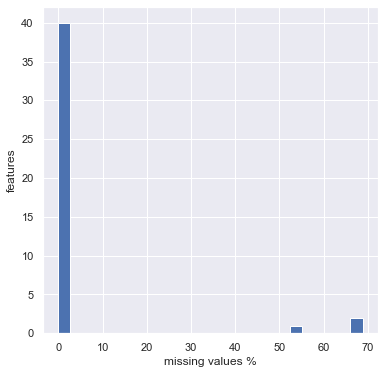

In [19]:
sns.distplot(a=control_df['missing_pct'], bins=25, kde=False, hist_kws={'alpha':1})
plt.ylabel('features')
plt.xlabel('missing values %');

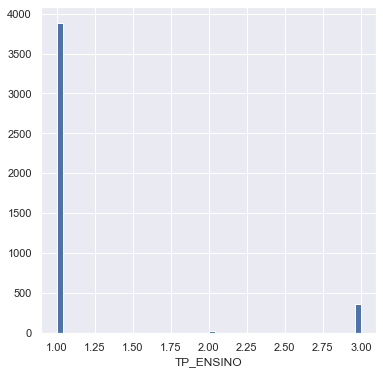

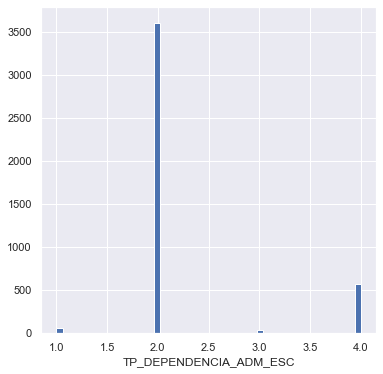

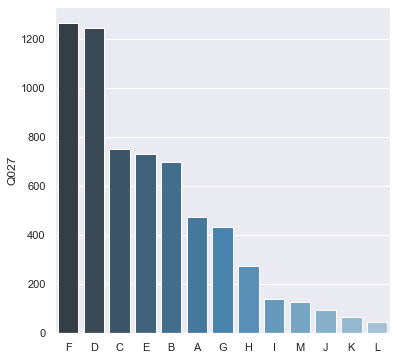

In [20]:
for col in control_df[(control_df['missing_pct']!=0)]['column']:
    fig = plt.figure()
    if train_df[col].dtype != 'object':
        sns.distplot(train_df[col].dropna(), kde=False, hist_kws={'alpha':1})
    else:
        sns.barplot(x=train_df[col].value_counts().index,
                    y=train_df[col].value_counts(),
                    palette='Blues_d')

The features `TP_ENSINO` and `TP_DEPENDENCIA_ADM_ESC` have far too many missing values, so we'll remove them and add them to a list for later use on the test dataset.  

In [21]:
columns_to_drop = ['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC']

dropColumns(df=train_df, cols=columns_to_drop)
control_df = makeControlDf(train_df)

columns_to_drop

['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC']

The variable `Q027` appears to be interesting though, it denotes from which age the student started working, and the missing values may denote that the student never worked - the previous question, `Q026`, actually asks if the student have worked before or works. If the answer is A, then the student never worked, so the next question cannot be answered.

In [22]:
print('Do all students that answer A to question 26 have missing values in question 27?')
print(np.all(train_df[train_df['Q026'] == 'A']['Q027'].isna()))

print('\nDo any students that answer B to question 26 have missing values in question 27?')
print(np.any(train_df[train_df['Q026'] == 'B']['Q027'].isna()))
print('How many missing values are these?')
print(train_df[train_df['Q026'] == 'B']['Q027'].isna().sum())

print('\nDo any students that answer C to question 26 have missing values in question 27?')
print(np.any(train_df[train_df['Q026'] == 'C']['Q027'].isna()))
print('How many missing values are these?')
print(train_df[train_df['Q026'] == 'C']['Q027'].isna().sum())

Do all students that answer A to question 26 have missing values in question 27?
True

Do any students that answer B to question 26 have missing values in question 27?
True
How many missing values are these?
92

Do any students that answer C to question 26 have missing values in question 27?
True
How many missing values are these?
66


So this implies that we'll be able to impute the values of `Q027` based on the values of `Q026`. The function below, `fillQ027`, imputes:  
* 'NW' when Q026 = A
* The most frequent value of Q027 when Q026 = B or C

In [23]:
subsA = 'NW' # for never_worked
subsB = train_df[train_df['Q026'] == 'B']['Q027'].value_counts().idxmax()
subsC = train_df[train_df['Q026'] == 'C']['Q027'].value_counts().idxmax()

def fillQ027(x, subsA=subsA, subsB=subsB, subsC=subsC):
    '''
    Substitutes missing values on Q027 for 'NW' when Q026 = A or the most frequent value of Q027 when Q026 = B or C.
    To be used with pandas .apply method.
    :param x: row of values from Q026 and Q027
    :return: string to be imputed in Q027
    '''
    q26 = x[0]
    q27 = x[1]
    
    if pd.isna(q27):
        if q26 == 'A':
            return subsA
        elif q26 == 'B':
            return subsB
        else:
            return subsC
    else:
        return q27

In [24]:
train_df['Q027'] = train_df[['Q026', 'Q027']].apply(fillQ027, axis=1)

We'll do the same for our test dataset.

In [25]:
test_df['Q027'] = test_df[['Q026', 'Q027']].apply(fillQ027, axis=1)

Let's check the distribution of missing columns again.

In [26]:
control_df = makeControlDf(train_df)
np.all(control_df['missing_pct'] == 0)

True

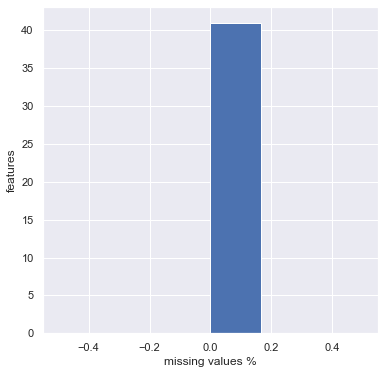

In [27]:
sns.distplot(a=control_df['missing_pct'], kde=False, hist_kws={'alpha':1})
plt.ylabel('features')
plt.xlabel('missing values %');

Now we're free of missing values!

#### Checking variability of features

We've already removed the `NU_INSCRICAO` feature, which behaved like an ID. Now, let's take a look if any other feature behaves in such a way, or if any feature have only but one unique value.

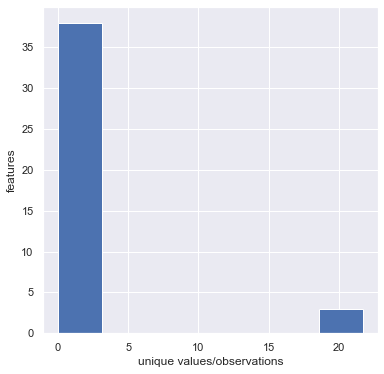

In [28]:
sns.distplot(a=control_df['unique_rate'], kde=False, bins=7, hist_kws={'alpha':1})
plt.ylabel('features')
plt.xlabel('unique values/observations');

In [30]:
control_df.sort_values('uniques').head()

,column,dtype,missing_pct,uniques,unique_rate
11,IN_CEGUEIRA,int64,0.0,1,0.01
0,IN_TREINEIRO,int64,0.0,2,0.01
37,Q025,object,0.0,2,0.01
25,TP_LINGUA,int64,0.0,2,0.01
4,TP_SEXO,object,0.0,2,0.01


We can see that the feature `IN_CEGUEIRA` have only one unique value. Let's take a closer look.

In [31]:
train_df['IN_CEGUEIRA'].value_counts()

0    13730
Name: IN_CEGUEIRA, dtype: int64

Indeed, this won't add any information. Let's remove and add it to the list `columns_to_drop` for later use on the preprocessing of the test data.

In [32]:
columns_to_drop = columns_to_drop + ['IN_CEGUEIRA']

dropColumns(df=train_df, cols=columns_to_drop)
control_df = makeControlDf(train_df)

columns_to_drop

['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_CEGUEIRA']

Let's also check the correlation of the non-object features with our target feature `IN_TREINEIRO`.

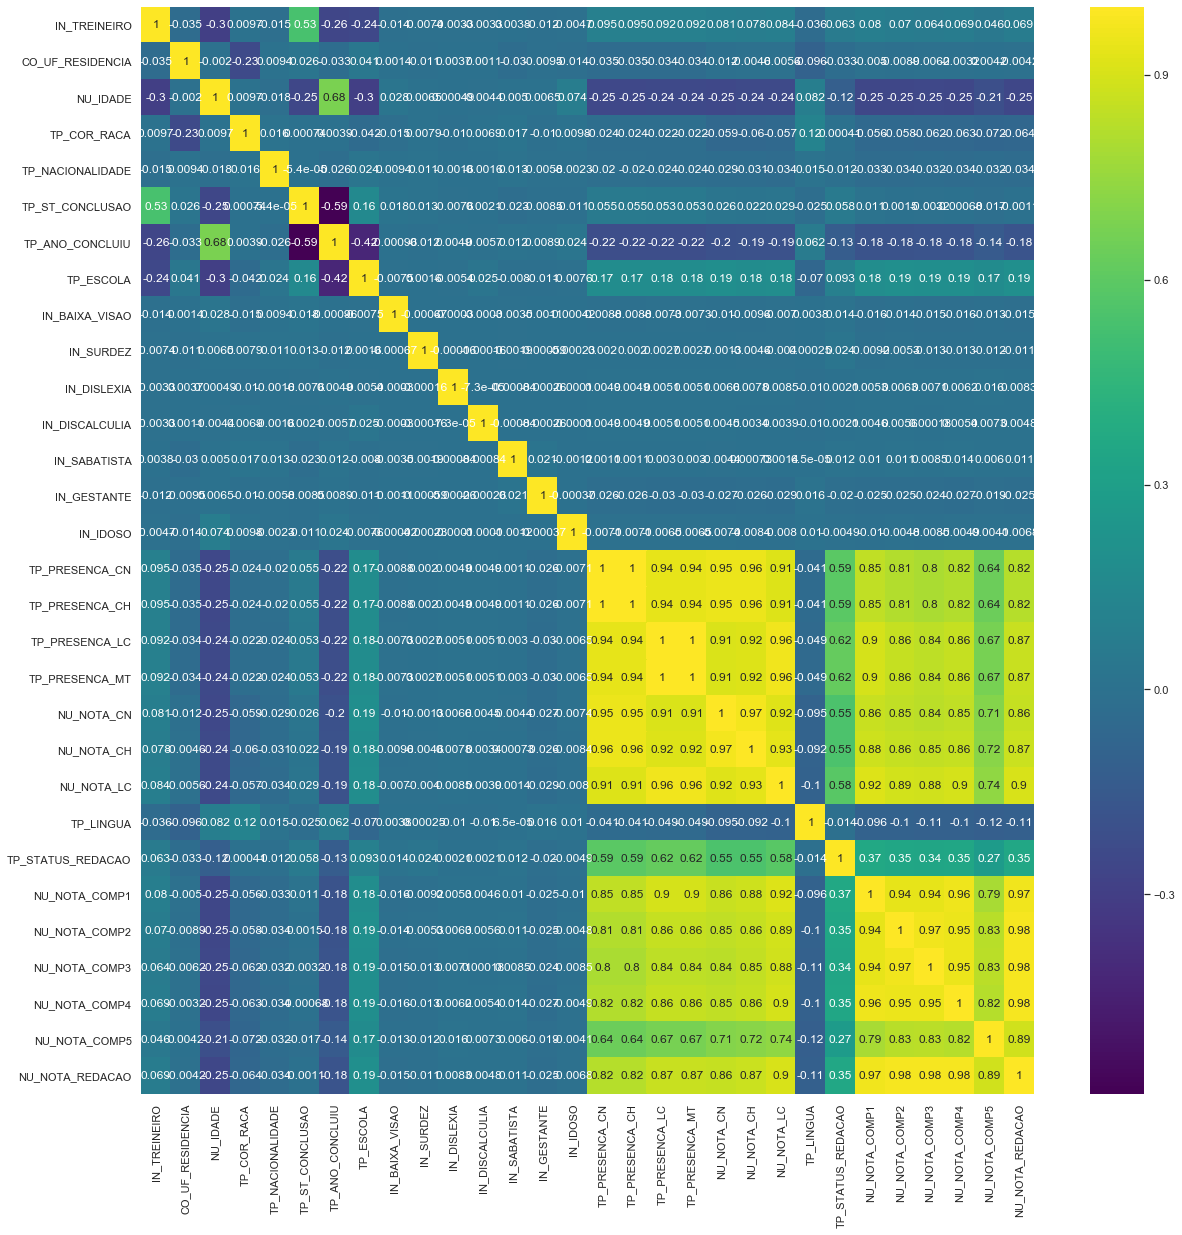

In [33]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr(), cmap='viridis', annot=True);

It seems like features that are most correlated with the target are `NU_IDADE`, `TP_ST_CONCLUSAO`, `TP_ANO_CONCLUIU` and `TP_ESCOLA`, which makes sense since students that perform the test just for training must be, overall, quite young - these features are about their ages, if they're still attending or will attend to high school, year of high school conclusion type of high school in which they studied (public, private or exterior).

c:\users\kpfra\anaconda3\envs\teste\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\kpfra\anaconda3\envs\teste\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


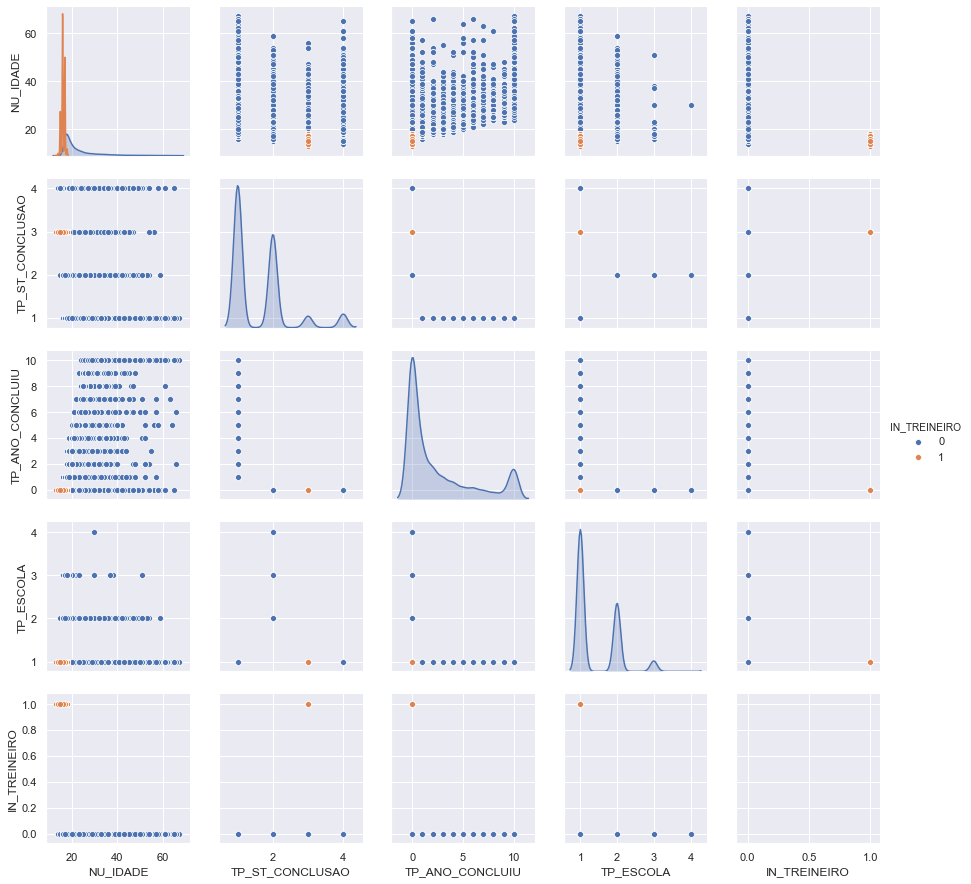

In [34]:
sns.pairplot(data=train_df[['NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO']],
             hue='IN_TREINEIRO');

#### Checking dtypes

Now, let's check if the features' types are functional/correct.

In [35]:
control_df['dtype'].value_counts()

int64      20
float64    10
object     10
Name: dtype, dtype: int64

* **The integers features are:**

In [36]:
control_df[control_df['dtype']=='int64']['column']

0         IN_TREINEIRO
1     CO_UF_RESIDENCIA
3             NU_IDADE
5          TP_COR_RACA
6     TP_NACIONALIDADE
7      TP_ST_CONCLUSAO
8      TP_ANO_CONCLUIU
9            TP_ESCOLA
10      IN_BAIXA_VISAO
11           IN_SURDEZ
12         IN_DISLEXIA
13      IN_DISCALCULIA
14        IN_SABATISTA
15         IN_GESTANTE
16            IN_IDOSO
17      TP_PRESENCA_CN
18      TP_PRESENCA_CH
19      TP_PRESENCA_LC
20      TP_PRESENCA_MT
24           TP_LINGUA
Name: column, dtype: object

The feature `CO_UF_RESIDENCIA` is the same as the feature `SG_UF_RESIDENCIA`, both indicate the state in which the student lives, so the first can be dropped.

In [37]:
columns_to_drop.append('CO_UF_RESIDENCIA')

dropColumns(df=train_df, cols=['CO_UF_RESIDENCIA'])
control_df = makeControlDf(train_df)

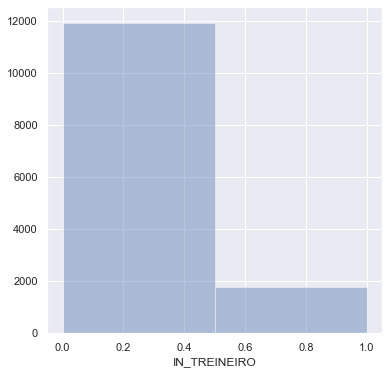

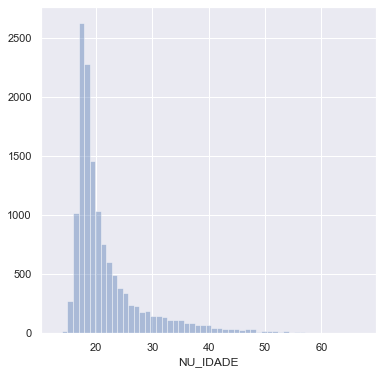

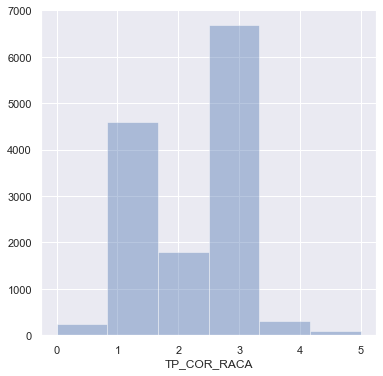

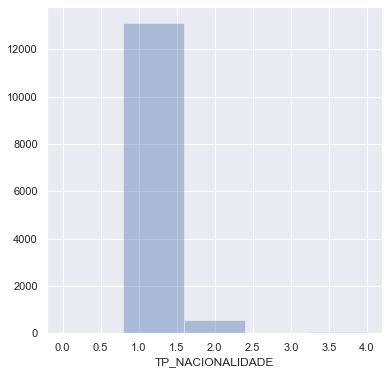

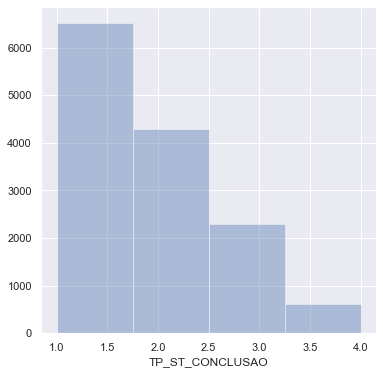

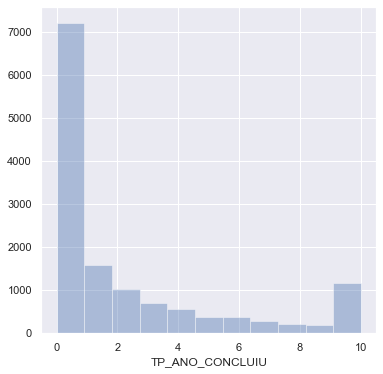

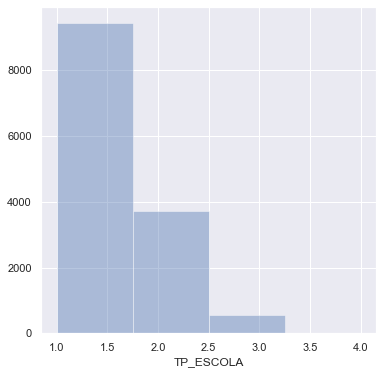

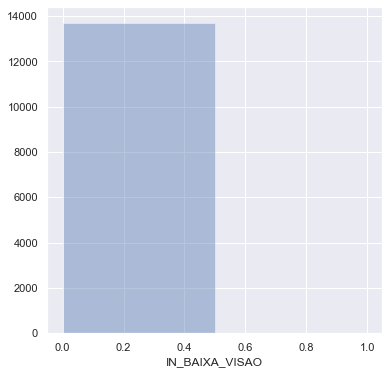

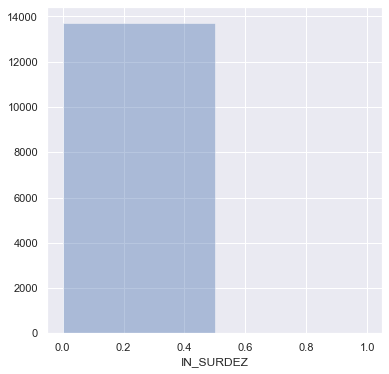

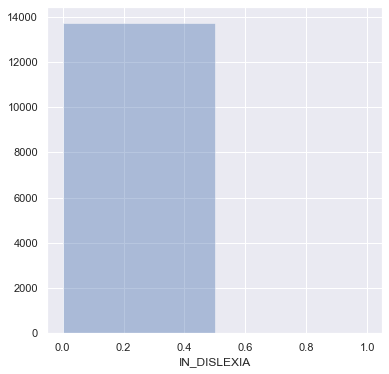

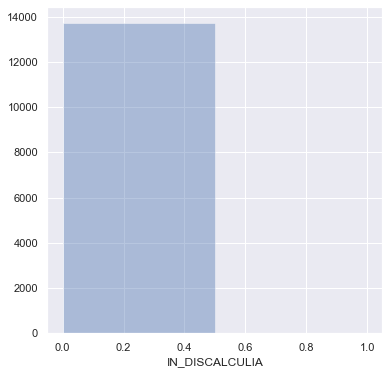

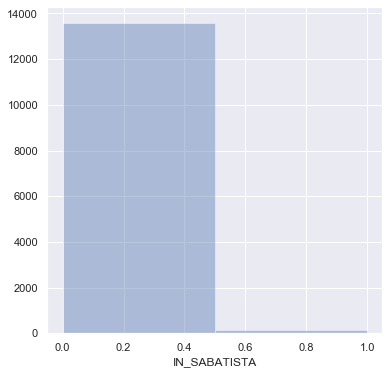

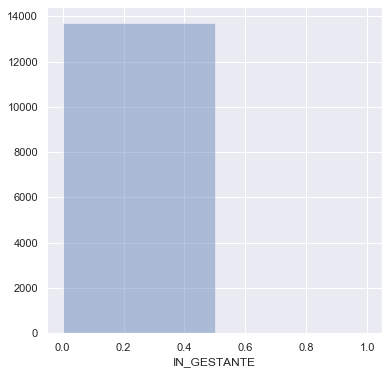

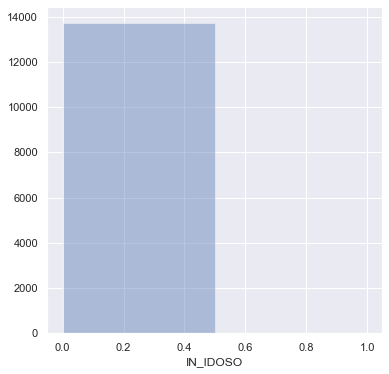

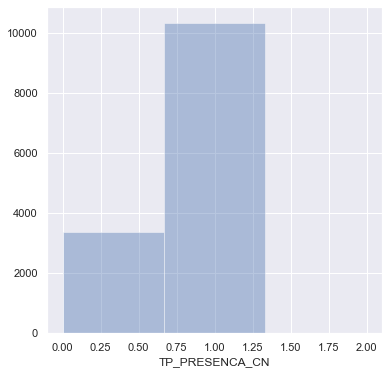

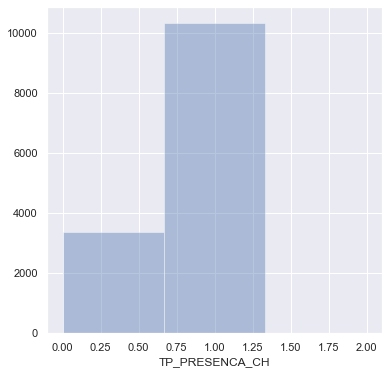

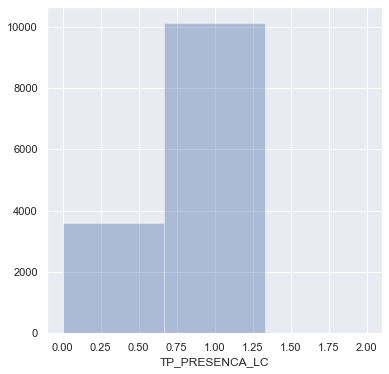

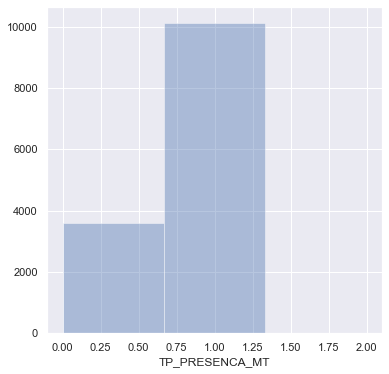

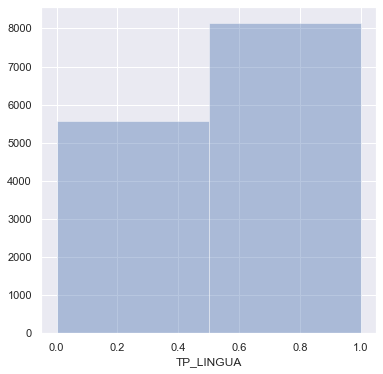

In [38]:
for col in control_df[control_df['dtype']=='int64']['column']:
    fig = plt.figure()
    sns.distplot(train_df[col], bins=train_df[col].nunique(), kde=False)

We can see through the distribution plots that the only feature that is actually an integer is `NU_IDADE`. It's distribution is very positively skewed. The rest of the features in this list are indeed categorical, and some of them have very low variability. Let's check their relationship with the target variable.

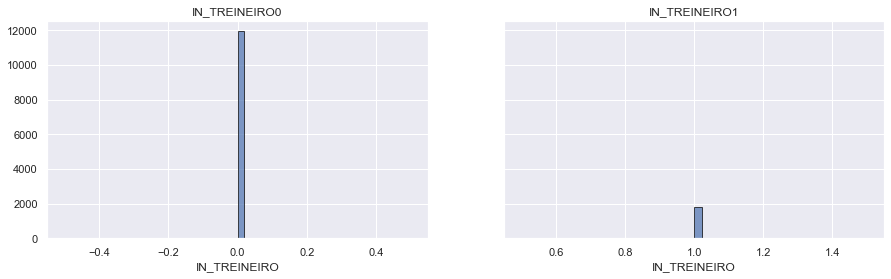

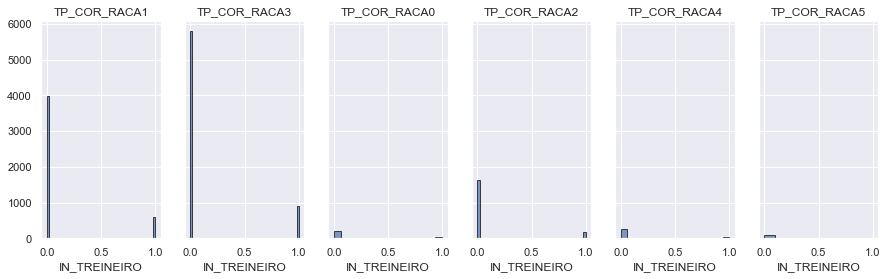

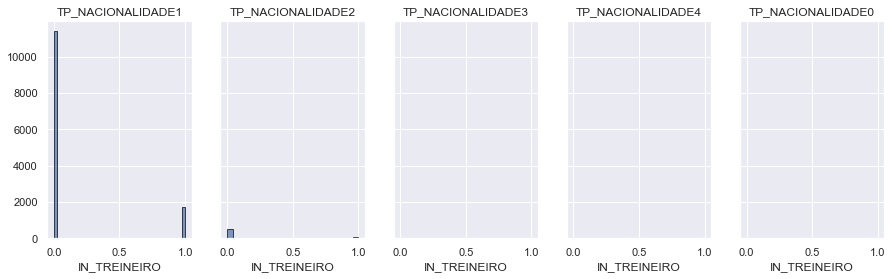

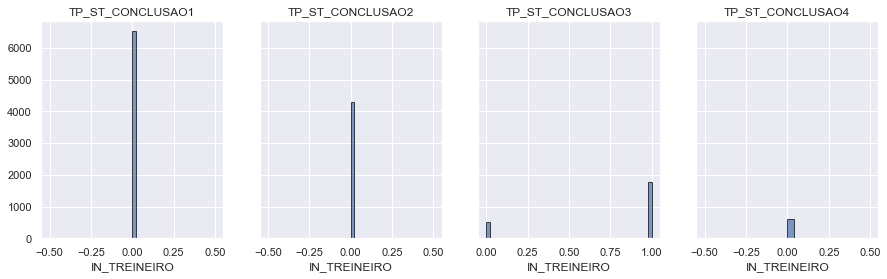

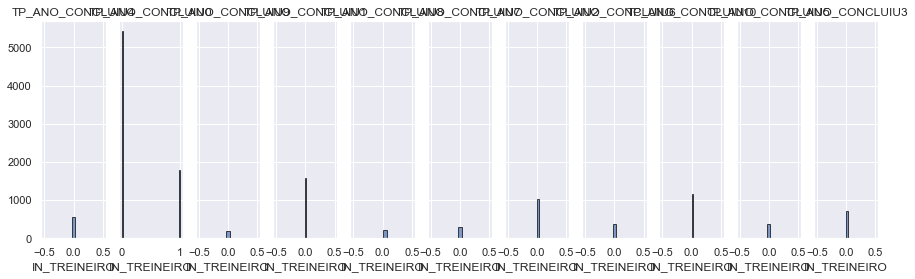

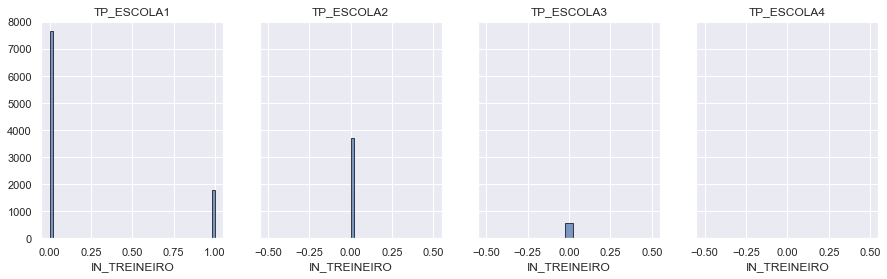

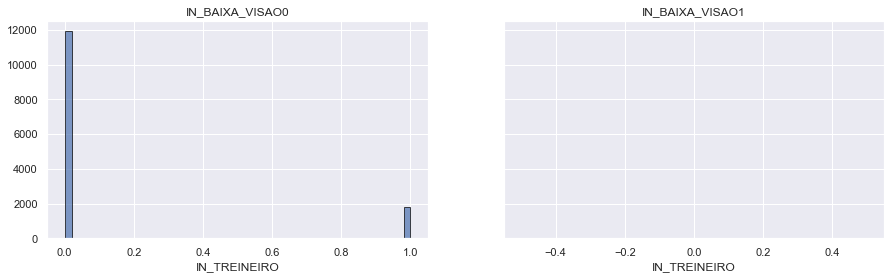

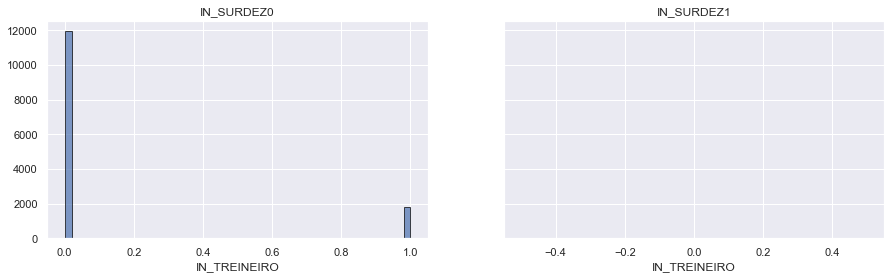

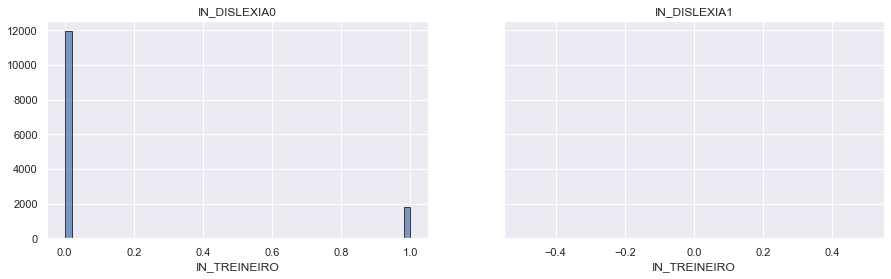

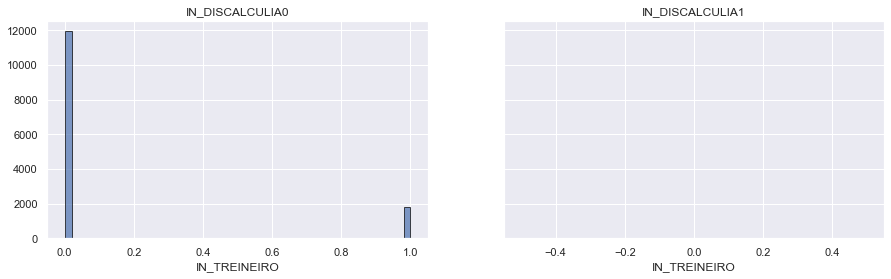

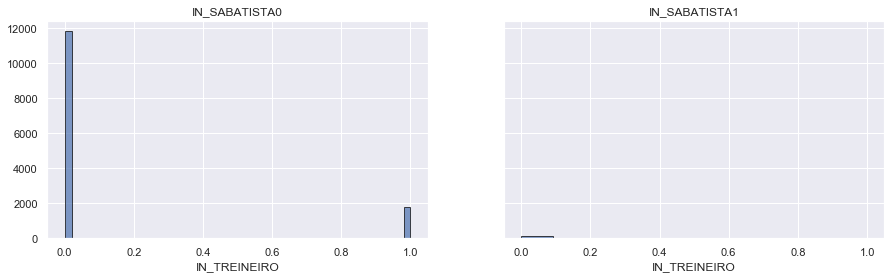

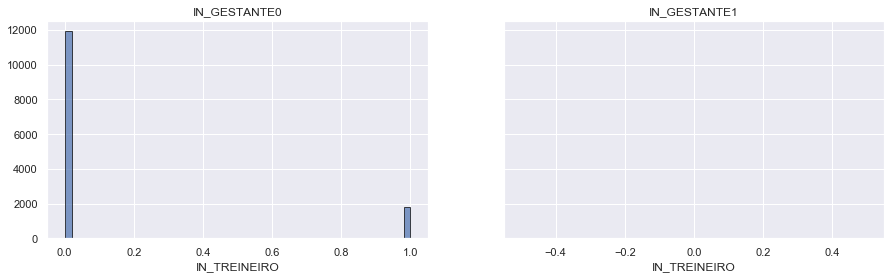

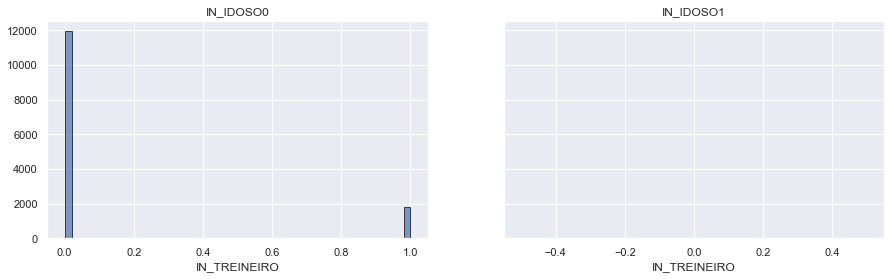

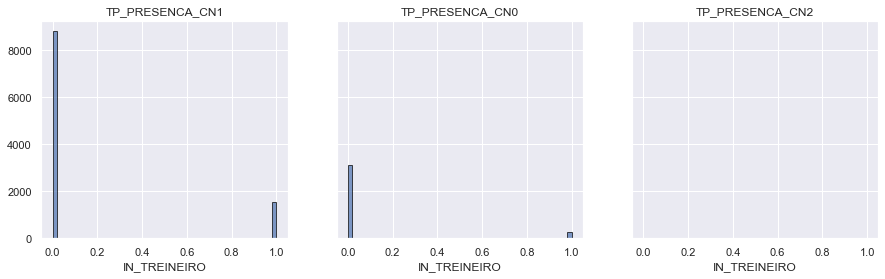

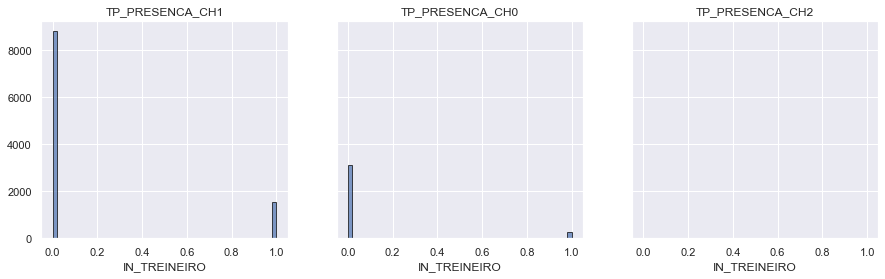

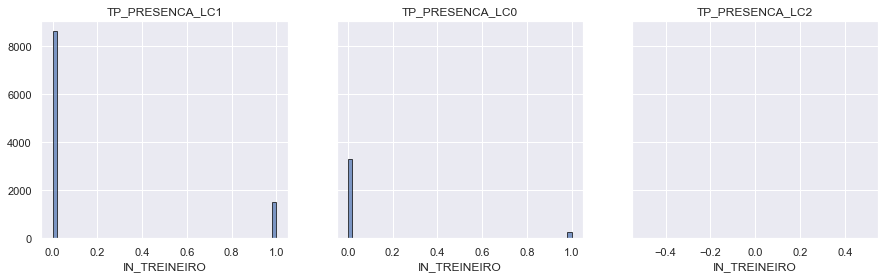

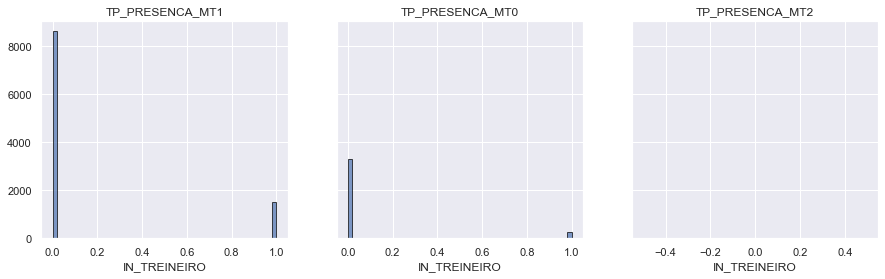

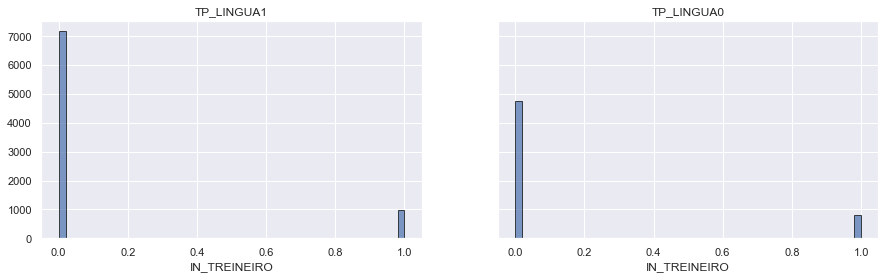

In [39]:
for col in control_df[(control_df['dtype']=='int64') & (control_df['column']!='NU_IDADE')]['column']:
    f, axes = plt.subplots(nrows=1, ncols=train_df[col].nunique(), figsize=(15, 4), sharey=True)
    for n, pos in zip(train_df[col].unique(), range(train_df[col].nunique())):
        sns.distplot(a=train_df[train_df[col]==n]['IN_TREINEIRO'], kde=False,
                     hist_kws={'edgecolor':'black',
                               'alpha':0.7,
                               'linewidth':1}, ax=axes[pos])
        axes[pos].set_title(col+str(n))

Many of these, like `IN_IDOSO`, have so many positive (1) cases that their distributions are impossible to see.  
Now, let's create lists of numeric and categorical variables to be used later in both train and test datasets pipelines.

In [40]:
numeric_features = ['NU_IDADE']
categorical_features = control_df[(control_df['dtype']=='int64')
                                  & (control_df['column']!='NU_IDADE')]['column'].to_list()

* **The floating point features are:**

In [41]:
control_df[control_df['dtype']=='float64']['column']

20           NU_NOTA_CN
21           NU_NOTA_CH
22           NU_NOTA_LC
24    TP_STATUS_REDACAO
25        NU_NOTA_COMP1
26        NU_NOTA_COMP2
27        NU_NOTA_COMP3
28        NU_NOTA_COMP4
29        NU_NOTA_COMP5
30      NU_NOTA_REDACAO
Name: column, dtype: object

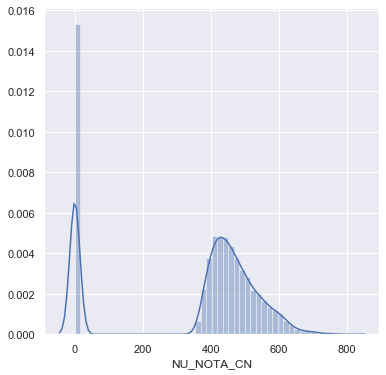

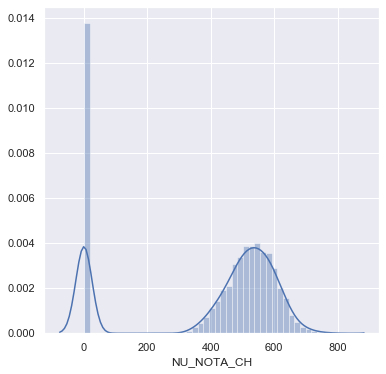

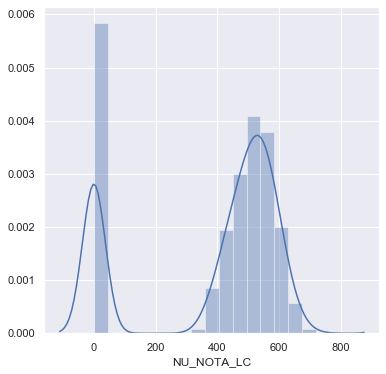

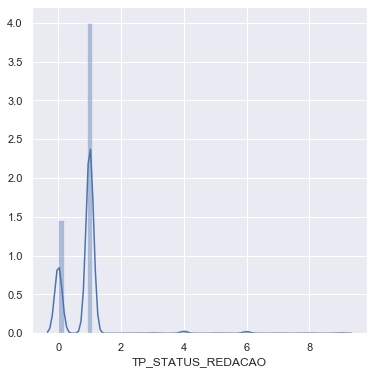

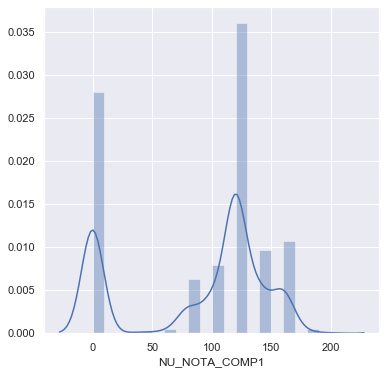

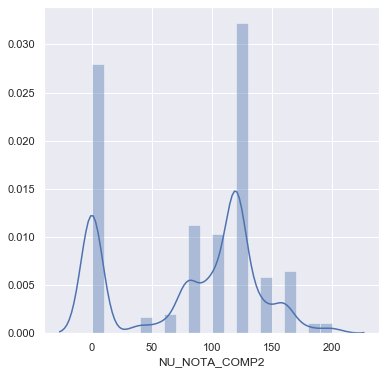

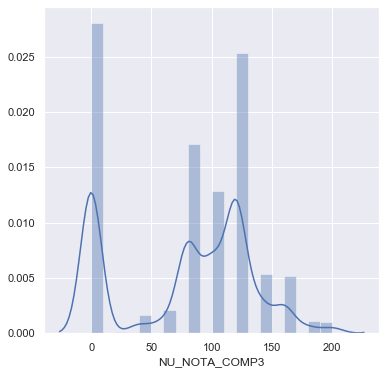

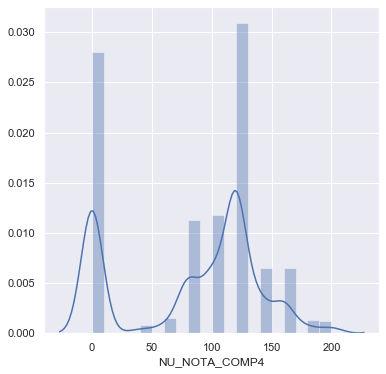

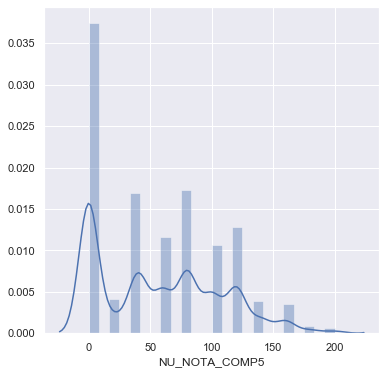

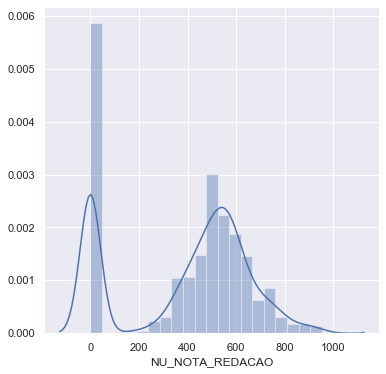

In [42]:
for col in control_df[control_df['dtype']=='float64']['column']:
    fig = plt.figure()
    sns.distplot(train_df[col])

The feature `TP_STATUS_REDACAO` is actually categorical.  
The features `NU_NOTA_COMPX` are numeric, but discrete.  
Features `NU_NOTA_CN`, `NU_NOTA_CH`, `NU_NOTA_LC` and `NU_NOTA_REDACAO` are all numeric.  
Let's also add these to the features lists.

In [43]:
categorical_features.append('TP_STATUS_REDACAO')
numeric_features = numeric_features + control_df[(control_df['dtype']=='float64')  
                                                 & (control_df['column']!='TP_STATUS_REDACAO')]['column'].to_list()

* **The type object features are:**

In [44]:
control_df[control_df['dtype']=='object']['column']

1     SG_UF_RESIDENCIA
3              TP_SEXO
31                Q001
32                Q002
33                Q006
34                Q024
35                Q025
36                Q026
37                Q027
38                Q047
Name: column, dtype: object

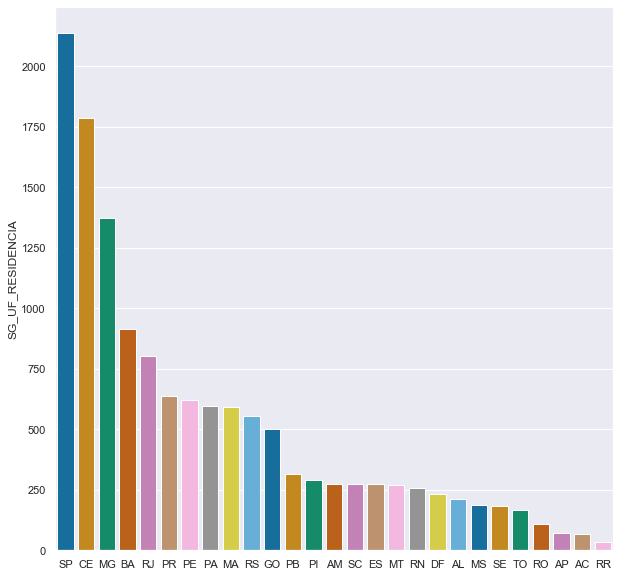

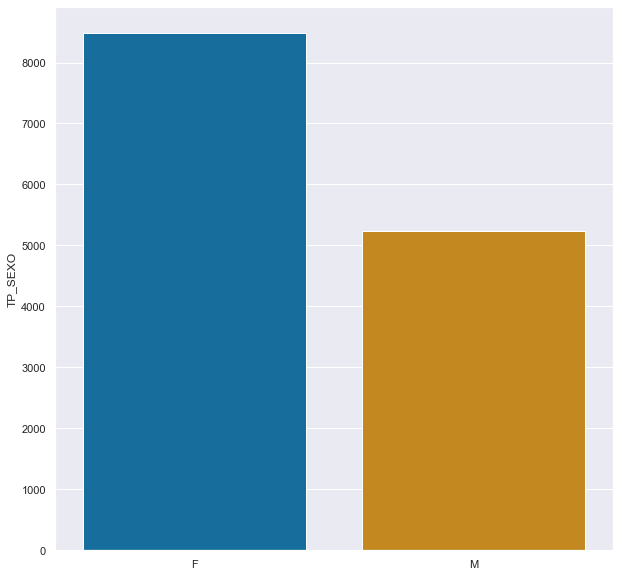

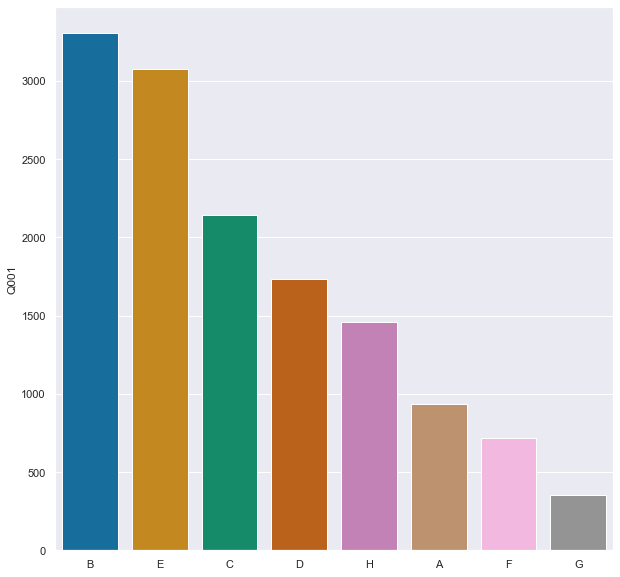

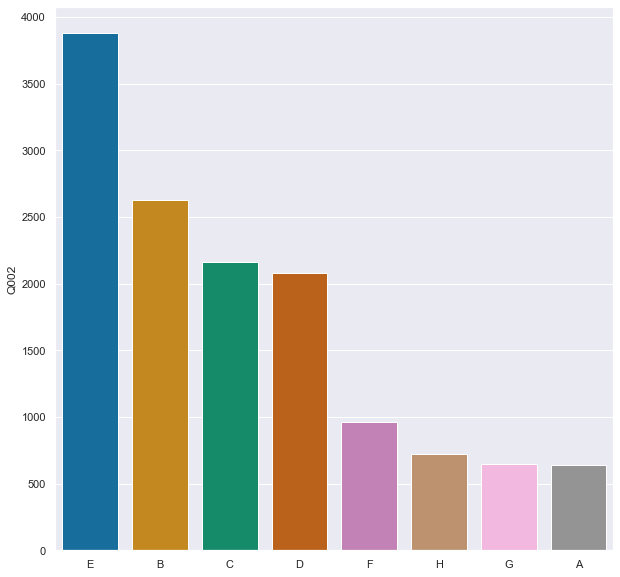

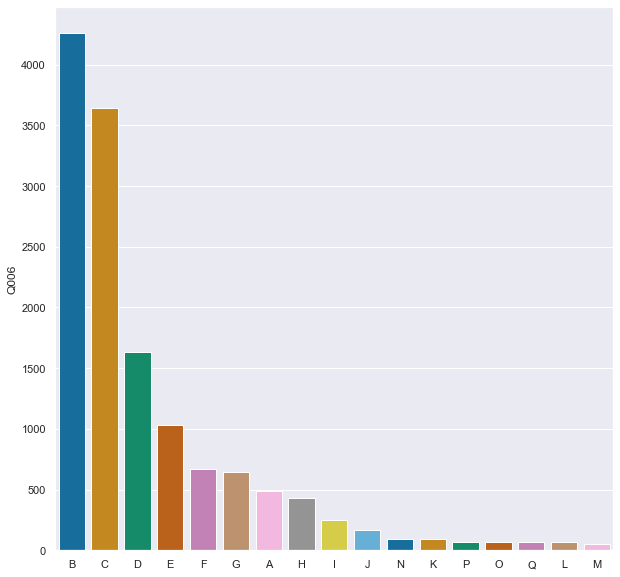

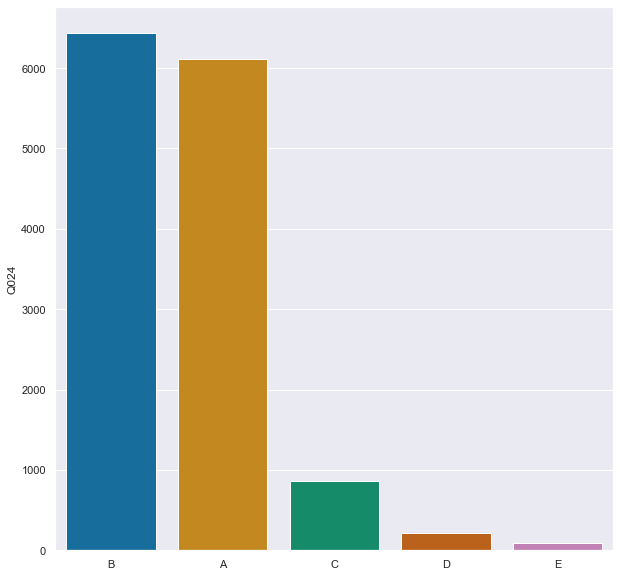

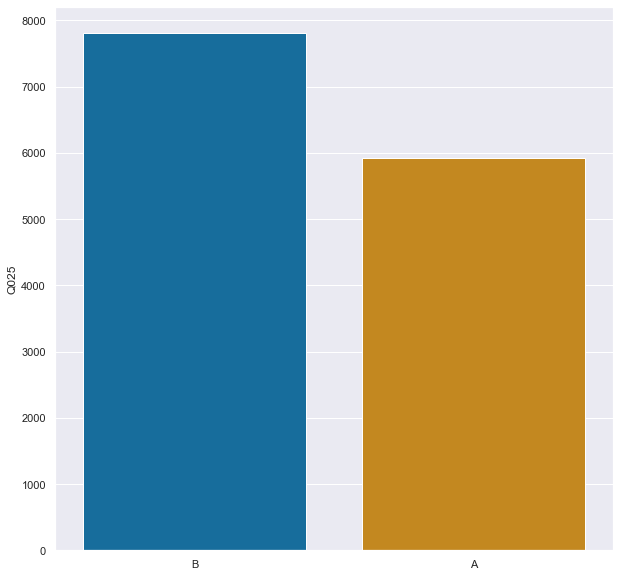

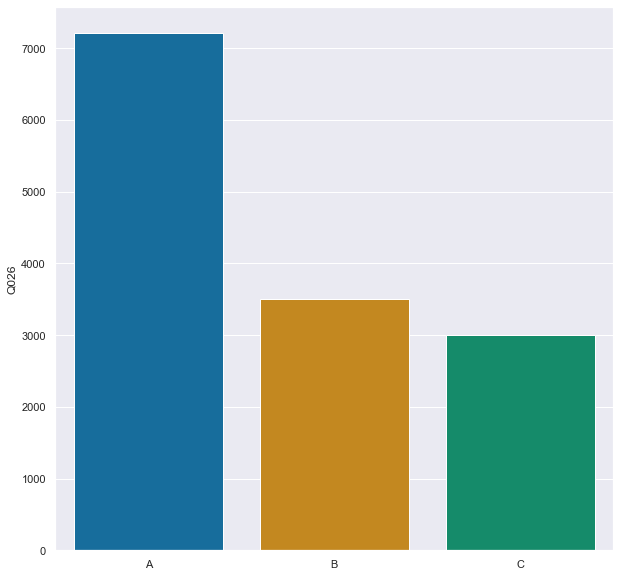

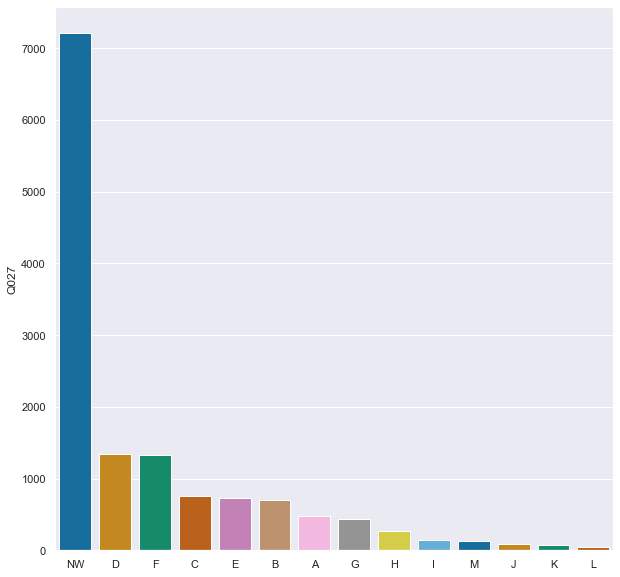

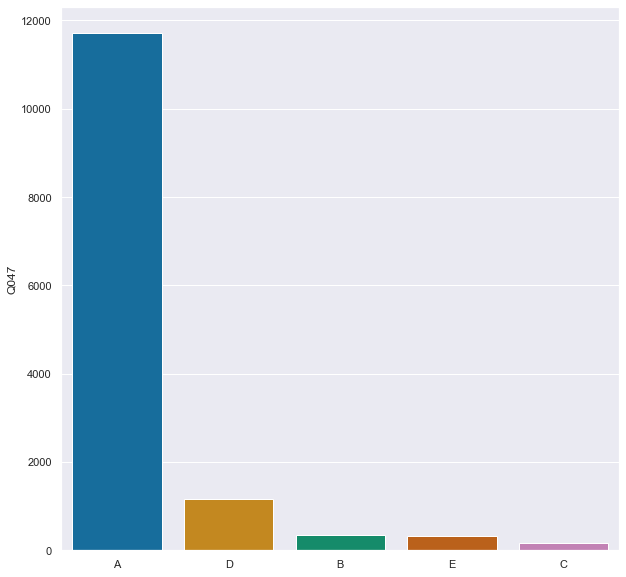

In [45]:
for col in control_df[control_df['dtype']=='object']['column']:
    fig = plt.figure(figsize=(10,10))
    sns.barplot(
        x=train_df[col].value_counts().index,
        y=train_df[col].value_counts(),
        palette="colorblind")

Some of the categorical features present most of the values in just a few categories. In some situations it could be usefull to set these to a separate unified class (like "rares" or "others").  
Let's add these to the categorical features list.

In [46]:
categorical_features = categorical_features + control_df[control_df['dtype']=='object']['column'].to_list()

#### Creating a pipeline for numeric and categorical values:

The following pipelines are:
* standardizing the numeric features  
* encoding categorical features with OneHotEncoder
* adding the selected estimator to the pipeline - LR for logistic regression, LRCV for logistic regression with cross validation, RF for Random forests.

Let's remove `IN_TREINEIRO` from our categorical features, we do not want it in the pipeline.

In [47]:
categorical_features.remove('IN_TREINEIRO')

In [48]:
def makePipeline(estimator='LR',
                 numeric_features=numeric_features,
                 categorical_features=categorical_features):
    '''
    Create a pipeline to standardize numeric features, encode categorical features with one hot encoding,
    and apply the selected estimator - logistic regression, logistic regresion with cross validation 
    or random forests classifier.
    :param estimator: string. accepts values 'LR' for logistic regression, 'LRCV' for logistic regression
    with cross validation, and 'RF' random forests classifier.
    :param numeric_features: list with the numeric features for the pipeline to apply transformations on.
    :param categorical_features: list with the categorical features for the pipeline to apply transformations on.
    :return: pipeline estimator ready to be instanciated and used with the common scikit-learn terminology.
    '''
    
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    if estimator=='LR':
        selected_estimator = LogisticRegression(max_iter=1000)
    elif estimator=='LRCV':
        selected_estimator = LogisticRegressionCV(max_iter=10000)
    elif estimator=='RF':
        selected_estimator = RandomForestClassifier()
    else:
        raise ValueError
        
    baseline_LR = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('Regression', selected_estimator)])
    
    return baseline_LR        

### Train models

#### Baseline Logistic Regression

Let's train the logistic regression model and check it's metrics.

In [50]:
X = train_df.drop('IN_TREINEIRO', axis=1)
y = train_df['IN_TREINEIRO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
baseline_LR = makePipeline()
baseline_LR.fit(X_train, y_train);
y_LR = baseline_LR.predict(X_test)

In [54]:
baseline_LR_metrics = {'accuracy': accuracy_score(y_test, y_LR),
                       'classification_report':classification_report(y_test, y_LR),
                       'confusion matrix': confusion_matrix(y_test, y_LR),
                       'roc_auc':roc_auc_score(y_test, y_LR)}

The code below saves the metrics for the baseline logistic regression in a dictionary, for later comparison with other models.

In [55]:
metrics = {'baseline_LR':{'accuracy': accuracy_score(y_test, y_LR),
                       'classification_report':classification_report(y_test, y_LR),
                       'confusion matrix': confusion_matrix(y_test, y_LR),
                       'roc_auc':roc_auc_score(y_test, y_LR)}}
print('accuracy:\n', metrics['baseline_LR']['accuracy'])
print('\nclassification_report:\n', metrics['baseline_LR']['classification_report'])
print('\nconfusion matrix:\n', metrics['baseline_LR']['confusion matrix'])
print('\nroc_auc:\n', metrics['baseline_LR']['roc_auc'])

accuracy:
 0.9924739014323865

classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3577
           1       0.95      0.99      0.97       542

    accuracy                           0.99      4119
   macro avg       0.98      0.99      0.98      4119
weighted avg       0.99      0.99      0.99      4119


confusion matrix:
 [[3550   27]
 [   4  538]]

roc_auc:
 0.9925358507149511


It did quite well! The F1 score implies that recall and precision are well balanced in both labels. The area under the curve also tells us that our model does quite well regardin the recall/fallout tradeoff.

#### Logistic Regression with CV and Random Forests classifiers

Now let's train and compare the metrics for Logistic Regression with cross validation, and random forests.

In [56]:
train_df_pre = train_df.copy()

X = train_df_pre.drop('IN_TREINEIRO', axis=1)
y = train_df_pre['IN_TREINEIRO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

baseline_LRCV = makePipeline(estimator='LRCV')
baseline_RF = makePipeline(estimator='RF')

baseline_LRCV.fit(X_train, y_train)
baseline_RF.fit(X_train, y_train)

y_LRCV = baseline_LRCV.predict(X_test)
y_RF = baseline_RF.predict(X_test)

As before, let's save the metrics in dictionaries. Also, let's plot the confusion matrix and ROC curve for each estimator.


METRICS FOR baseline_LR

accuracy:
 0.9924739014323865

classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3577
           1       0.95      0.99      0.97       542

    accuracy                           0.99      4119
   macro avg       0.98      0.99      0.98      4119
weighted avg       0.99      0.99      0.99      4119


confusion matrix:
 [[3550   27]
 [   4  538]]

roc_auc:
 0.9925358507149511
------------------------------------------------------------------------------------------------------------------------

METRICS FOR baseline_LRCV

accuracy:
 0.9949016751638747

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3577
           1       0.98      0.98      0.98       542

    accuracy                           0.99      4119
   macro avg       0.99      0.99      0.99      4119
weighted avg       0.99      0.99      

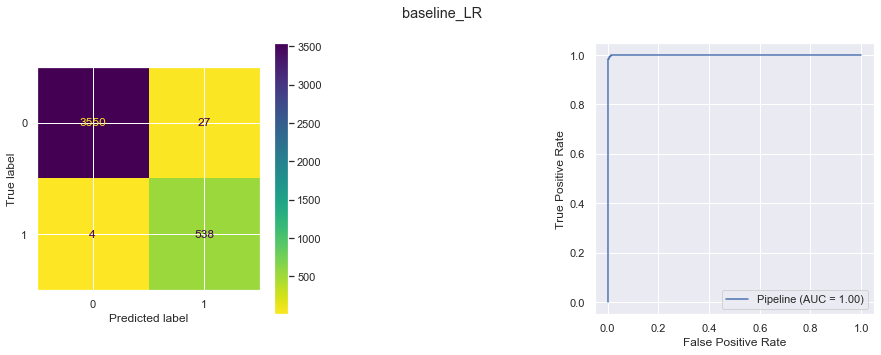

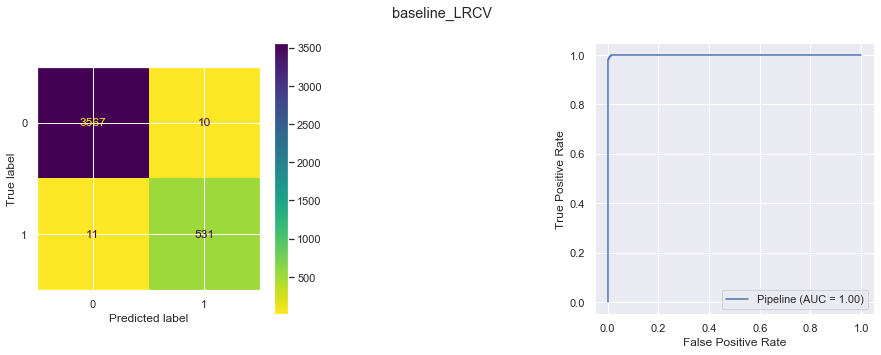

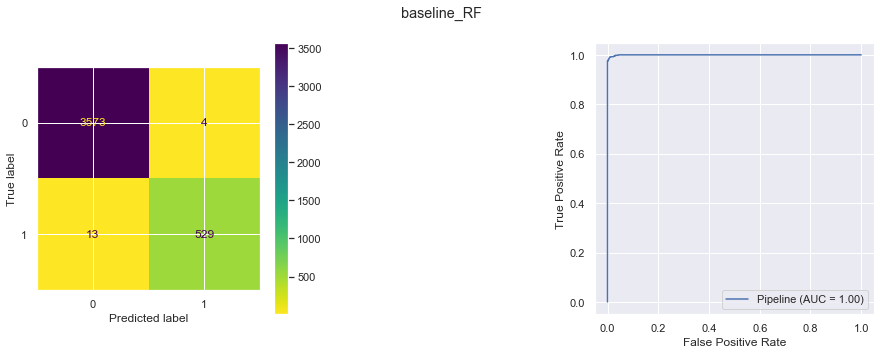

In [69]:
for experiment, y_predicted, estimator in zip(
    ['baseline_LR', 'baseline_LRCV', 'baseline_RF'],
    [y_LR, y_LRCV, y_RF],
    [baseline_LR, baseline_LRCV, baseline_RF]):
    print(f'\nMETRICS FOR {experiment}')
    metrics.update({experiment:{'accuracy': accuracy_score(y_test, y_predicted),
                                'classification_report':classification_report(y_test, y_predicted),
                                'confusion matrix': confusion_matrix(y_test, y_predicted),
                                'roc_auc':roc_auc_score(y_test, y_predicted)}})
    print('\naccuracy:\n', metrics[experiment]['accuracy'])
    print('\nclassification_report:\n', metrics[experiment]['classification_report'])
    print('\nconfusion matrix:\n', metrics[experiment]['confusion matrix'])
    print('\nroc_auc:\n', metrics[experiment]['roc_auc'])
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    plot_confusion_matrix(estimator, X_test, y_test, cmap='viridis_r', ax=axes[0]);
    plot_roc_curve(estimator, X_test, y_test, ax=axes[1]);
    fig.suptitle(experiment)
    plt.subplots_adjust(wspace = 1)
    print(120*'-')

The three models presented great metrics. Logistic Regression with CV did better than logistic regression by itself in all metrics but the AUC and recall for class 1, and Random Forests did better than both models or equally good in all metrics but recall and AUC - by a small difference. Let's use RandomForests!

#### Processing test_values and sending to evaluation

Now let's use all the train dataset to train the random forests model, save the answers along with the students' ID's in a csv file (answers.csv) and send them to the website evaluation system ([codenation](www.codenation.com.br)).  
First, let's drop the list of columns to drop from our test dataframe, then train our classifier.

In [70]:
nu_inscricao = test_df['NU_INSCRICAO']
trial_df = test_df.copy()
trial_df.drop('NU_INSCRICAO', axis=1, inplace=True)
trial_df = trial_df.drop(columns_to_drop, axis=1)

In [71]:
X_train = train_df_pre.drop('IN_TREINEIRO', axis=1)
y_train = train_df_pre['IN_TREINEIRO']

clf_pipeline = makePipeline(estimator='RF')
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['NU_IDADE', 'NU_NOTA_CN',
                                                   'NU_NOTA_CH', 'NU_NOTA_LC',
                                                   'NU_NOTA_COMP1',
                                                   'NU_NOTA_COMP2',
                                                   'NU_NOTA_COMP3',
                                                   'NU_NOTA_COMP4',
                                                   'NU_NOTA_COMP5',
                                                   'NU_NOTA_REDACAO']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                           

In [72]:
trial = pd.Series(clf_pipeline.predict(trial_df))
answer = pd.concat([nu_inscricao, trial], axis=1, keys=['NU_INSCRICAO', 'IN_TREINEIRO'])
answer.to_csv('answer.csv', index=False)

**With the Random Forests algorithm, the scoring website gave our model a whooping 99.71!**